In [20]:
import pandas as pd
import numpy as np

In [21]:
dataset = pd.read_csv("../../data/Position_Salaries.csv")
print(dataset)
print(type(dataset))

            Position  Level   Salary
0   Business Analyst      1    20000
1  Junior Consultant      2    50000
2  Senior Consultant      3    90000
3            Manager      4   140000
4    Country Manager      5   180000
5     Region Manager      6    40000
6            Partner      7  3500000
7     Senior Partner      8   460000
8            C-level      9   580000
9                CEO     10  1000000
<class 'pandas.core.frame.DataFrame'>


In [22]:
X = dataset.iloc[:, 1].values
X = X.reshape(len(X), 1)
print(X)
print(X.ndim)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
2


In [23]:
y = dataset.iloc[:, 2].values
print(y)

[  20000   50000   90000  140000  180000   40000 3500000  460000  580000
 1000000]


In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 2)
X_poly = poly_feature.fit_transform(X)
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [25]:


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = regressor.predict(X_poly)
print(y_pred)
print(y)

[-283181.81818182   14818.18181818  275166.66666667  497863.63636364
  682909.09090909  830303.03030303  940045.45454545 1012136.36363636
 1046575.75757576 1043363.63636364]
[  20000   50000   90000  140000  180000   40000 3500000  460000  580000
 1000000]


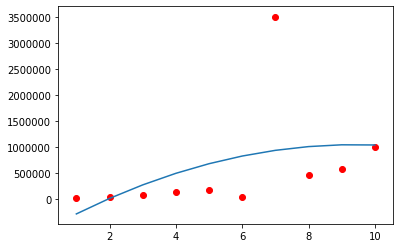

In [27]:
import matplotlib.pyplot as plt
plt.plot(X, regressor.predict(X_poly))
plt.scatter(X, y, color="red")
plt.show()

In [28]:
y_pred_data = regressor.predict(poly_feature.fit_transform([[11]]))
print(y_pred_data)

[1002500.]
